In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'no-latex'])
plt.close('all')

## Load pickled DataFrame
DataFrame files may have different W, L, Vg, Vd stepping.  It is better to load this manually.

In [3]:
modelName = "mos_iv_nfet_01v8.pkl"
dfm = pd.read_pickle(modelName)

In [4]:
dfm.index.levels[0], dfm.index.levels[1], dfm.index.levels[2], dfm.index.levels[3]

(Float64Index([ 0.42,  0.52,  0.54,  0.55,  0.58,   0.6,  0.61,  0.64,  0.65,
                0.74,  0.84,   1.0,  1.26,  1.68,   2.0,   3.0,   5.0,   7.0,
               100.0],
              dtype='float64', name='W'),
 Float64Index([0.15, 0.18, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 20.0, 100.0], dtype='float64', name='L'),
 Float64Index([               0.0,              0.005,               0.01,
                            0.015,               0.02,              0.025,
                             0.03,              0.035,               0.04,
                            0.045,
               ...
               1.7550000000000001,               1.76, 1.7650000000000001,
                             1.77, 1.7750000000000001,               1.78,
               1.7850000000000001,               1.79,              1.795,
                              1.8],
              dtype='float64', name='Vg', length=361),
 Float64Index([               0.0,              0.005,               0.01,
         

In [5]:
dfm1 = dfm.loc[1.0,1.0].unstack(0) # unstack(0) to make Vd the row index, (1) to make Vg the row index
x = dfm.index.levels[3].to_numpy()
dfm1.head()

Id                                                          \
Vg            0.000         0.005         0.010         0.015         0.020   
Vd                                                                            
0.000 -1.607365e-42 -2.788536e-44 -8.886236e-44  1.444069e-44 -7.226811e-44   
0.005  9.058726e-15  9.676288e-15  1.039099e-14  1.122019e-14  1.218470e-14   
0.010  1.714601e-14  1.822154e-14  1.949135e-14  2.094852e-14  2.264161e-14   
0.015  2.501471e-14  2.654821e-14  2.831763e-14  3.035766e-14  3.273076e-14   
0.020  3.244627e-14  3.434752e-14  3.655409e-14  3.910761e-14  4.204970e-14   

                                                                             \
Vg            0.025         0.030         0.035         0.040         0.045   
Vd                                                                            
0.000  1.099272e-43 -9.347099e-45  7.603317e-30  2.745347e-30 -7.960598e-30   
0.005  1.329492e-14  1.458902e-14  1.608783e-14  1.782255e-14  1.983136e-14   
0.010  2.460532e-14  2.688127e-14  2.951805e-14  3.257117e-14  3.611694e-14   
0.015  3.547856e-14  3.867739e-14  4.237583e-14  4.666406e-14  5.163231e-14   
0.020  4.547751e-14  4.943268e-14  5.404011e-14  5.936918e-14  6.554479e-14   

       ...                                                          \
Vg     ...         1.755         1.760         1.765         1.770   
Vd     ...                                                           
0.000  ...  7.150672e-21  7.148697e-21  7.146634e-21  7.144483e-21   
0.005  ...  1.206944e-06  1.210645e-06  1.214327e-06  1.217991e-06   
0.010  ...  2.406683e-06  2.414089e-06  2.421459e-06  2.428792e-06   
0.015  ...  3.599232e-06  3.610348e-06  3.621410e-06  3.632417e-06   
0.020  ...  4.784607e-06  4.799438e-06  4.814197e-06  4.828883e-06   

                                                                             \
Vg            1.775         1.780         1.785         1.790         1.795   
Vd                                                                            
0.000  7.142245e-21  7.139921e-21  7.851261e-21  7.848516e-21  7.845676e-21   
0.005  1.221637e-06  1.225265e-06  1.228875e-06  1.232466e-06  1.236040e-06   
0.010  2.436089e-06  2.443350e-06  2.450574e-06  2.457762e-06  2.464914e-06   
0.015  3.643370e-06  3.654269e-06  3.665113e-06  3.675903e-06  3.686639e-06   
0.020  4.843497e-06  4.858039e-06  4.872508e-06  4.886905e-06  4.901230e-06   

                     
Vg            1.800  
Vd                   
0.000  7.842743e-21  
0.005  1.239595e-06  
0.010  2.472030e-06  
0.015  3.697320e-06  
0.020  4.915482e-06  

[5 rows x 361 columns]

Label(value='W/L')

SelectionSlider(description='W', index=11, options=(0.42, 0.52, 0.54, 0.55, 0.58, 0.6, 0.61, 0.64, 0.65, 0.74,…

SelectionSlider(description='L', index=4, options=(0.15, 0.18, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 20.0, 100.0), va…

IntSlider(value=10, description='Vg or Vd step', max=50, min=1)

/tmp/ipykernel_99326/3100911460.py:33: RuntimeWarning: invalid value encountered in reciprocal
  ro = np.reciprocal(np.gradient(dfm2, x, axis=0))


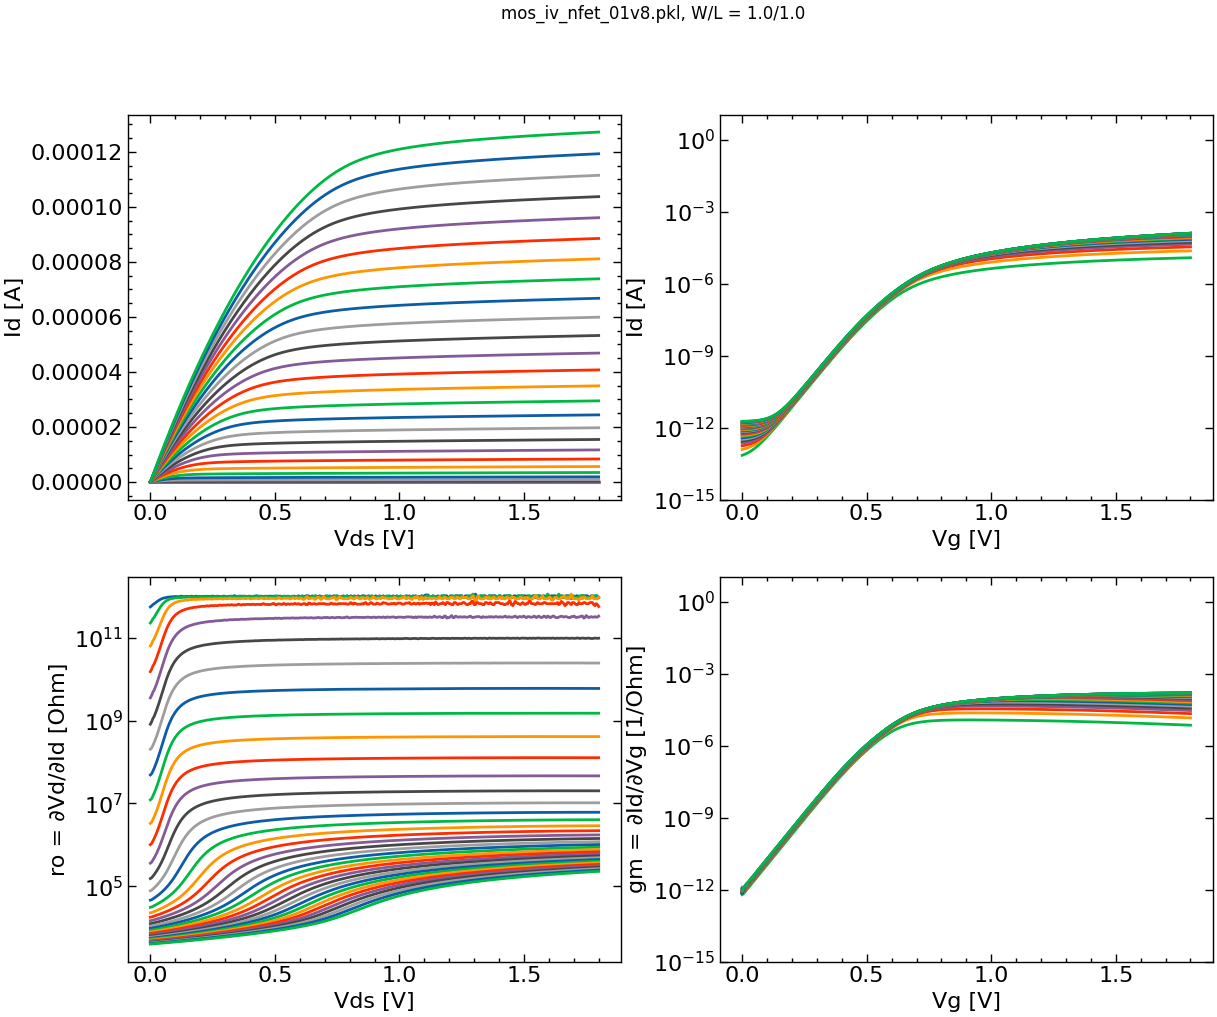

In [6]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 11)

import ipywidgets as widgets
cWL = widgets.Label(value='W/L')
sWs = widgets.SelectionSlider(description=dfm.index.levels[0].name, options=dfm.index.levels[0], value=1.0)
sLs = widgets.SelectionSlider(description=dfm.index.levels[1].name, options=dfm.index.levels[1], value=1.0)
sVgVdStep = widgets.IntSlider(description="Vg or Vd step", value=10, min=1, max=50, step=1)
display(cWL, sWs, sLs, sVgVdStep)

def widget_value_change_handler(change):
    fig.suptitle("{}, W/L = {}/{}".format(modelName, sWs.value, sLs.value))

    # Id vs Vd
    axs[0, 0].cla()
    axs[0, 0].set_xlabel('Vds [V]')
    axs[0, 0].set_ylabel('Id [A]')
    cWL.value = "{}, W/L = {}/{}, Vg step = {}".format(modelName, sWs.value, sLs.value, sVgVdStep.value)
    dfm1 = dfm.loc[sWs.value, sLs.value].unstack(0) # row index is Vd.
    dfm2 = dfm1.loc[:, ::sVgVdStep.value]
    axs[0, 0].plot(dfm2)
    # Id vs Vg
    axs[0, 1].cla()
    axs[0, 1].set_xlabel('Vg [V]')
    axs[0, 1].set_ylabel('Id [A]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_ylim(bottom=1e-15)
    dfm3 = dfm.loc[sWs.value, sLs.value].unstack(1).loc[:, ::sVgVdStep.value] # row index is Vg.
    x = dfm.index.levels[2].to_numpy() # Vg
    axs[0, 1].plot(np.abs(dfm3))
    # ro
    x = dfm.index.levels[3].to_numpy() # Vd
    ro = np.reciprocal(np.gradient(dfm2, x, axis=0))
    axs[1, 0].cla()
    axs[1, 0].set_xlabel('Vds [V]')
    axs[1, 0].sharex(axs[0, 0])
    axs[1, 0].set_ylabel('ro = ∂Vd/∂Id [Ohm]')
    axs[1, 0].set_yscale("log")
    axs[1, 0].plot(x, ro)
    # gm
    x = dfm.index.levels[2].to_numpy() # Vg
    gm = np.gradient(dfm3, x, axis=0)
    axs[1, 1].cla()
    axs[1, 1].set_xlabel('Vg [V]')
    axs[1, 1].sharex(axs[0, 1])
    axs[1, 1].set_ylabel('gm = ∂Id/∂Vg [1/Ohm]')
    axs[1, 1].set_yscale("log")
    axs[1, 1].set_ylim(1e-15)
    x = dfm.index.levels[2].to_numpy() # Vg
    axs[1, 1].plot(x, gm)

    fig.canvas.draw_idle()

sWs.observe(widget_value_change_handler, names='value')
sLs.observe(widget_value_change_handler, names='value')
sVgVdStep.observe(widget_value_change_handler, names='value')
widget_value_change_handler(0)